<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Science-Project-Portfolios/blob/main/Debiased_ML_for_Correlated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition and Understanding

In [108]:
# Read file data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/framingham_heart_disease.csv')
# Display the first few rows of the dataset
data = df
data = pd.DataFrame(df)
print(data.head())

   Male  Age  Education  Current Smoker  Cigs Per Day  BP Meds  \
0     1   39        4.0               0           0.0      0.0   
1     0   46        2.0               0           0.0      0.0   
2     1   48        1.0               1          20.0      0.0   
3     0   61        3.0               1          30.0      0.0   
4     0   46        3.0               1          23.0      0.0   

   Prevalent Stroke  Prevalent Hyp  Diabetes  Total cholesterol  Sys BP  \
0                 0              0         0              195.0   106.0   
1                 0              0         0              250.0   121.0   
2                 0              0         0              245.0   127.5   
3                 0              1         0              225.0   150.0   
4                 0              0         0              285.0   130.0   

   Dia BP    BMI  Heart Rate  Glucose  Ten Year CHD  
0    70.0  26.97        80.0     77.0             0  
1    81.0  28.73        95.0     76.0       

In [109]:
df.shape

(4238, 16)

In [110]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Male               4238 non-null   int64  
 1   Age                4238 non-null   int64  
 2   Education          4133 non-null   float64
 3   Current Smoker     4238 non-null   int64  
 4   Cigs Per Day       4209 non-null   float64
 5   BP Meds            4185 non-null   float64
 6   Prevalent Stroke   4238 non-null   int64  
 7   Prevalent Hyp      4238 non-null   int64  
 8   Diabetes           4238 non-null   int64  
 9   Total cholesterol  4188 non-null   float64
 10  Sys BP             4238 non-null   float64
 11  Dia BP             4238 non-null   float64
 12  BMI                4219 non-null   float64
 13  Heart Rate         4237 non-null   float64
 14  Glucose            3850 non-null   float64
 15  Ten Year CHD       4238 non-null   int64  
dtypes: float64(9), int64(7)


In [111]:
df.columns

Index(['Male', 'Age', 'Education', 'Current Smoker', 'Cigs Per Day', 'BP Meds',
       'Prevalent Stroke', 'Prevalent Hyp', 'Diabetes', 'Total cholesterol',
       'Sys BP', 'Dia BP', 'BMI', 'Heart Rate', 'Glucose', 'Ten Year CHD'],
      dtype='object')

In [112]:
# Check for missing values
print(data.isnull().sum())

Male                   0
Age                    0
Education            105
Current Smoker         0
Cigs Per Day          29
BP Meds               53
Prevalent Stroke       0
Prevalent Hyp          0
Diabetes               0
Total cholesterol     50
Sys BP                 0
Dia BP                 0
BMI                   19
Heart Rate             1
Glucose              388
Ten Year CHD           0
dtype: int64


# Data Preprocessing

In [113]:
# Handling Missing Data

from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)


In [114]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Scale the features (except for the target variable 'Ten Year CHD')
scaler = StandardScaler()
features = data_imputed.drop('Ten Year CHD', axis=1)
features_scaled = scaler.fit_transform(features)

# Combine the scaled features with the target variable
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['Ten Year CHD'] = data_imputed['Ten Year CHD']


# Exploratory Data Analysis (EDA)

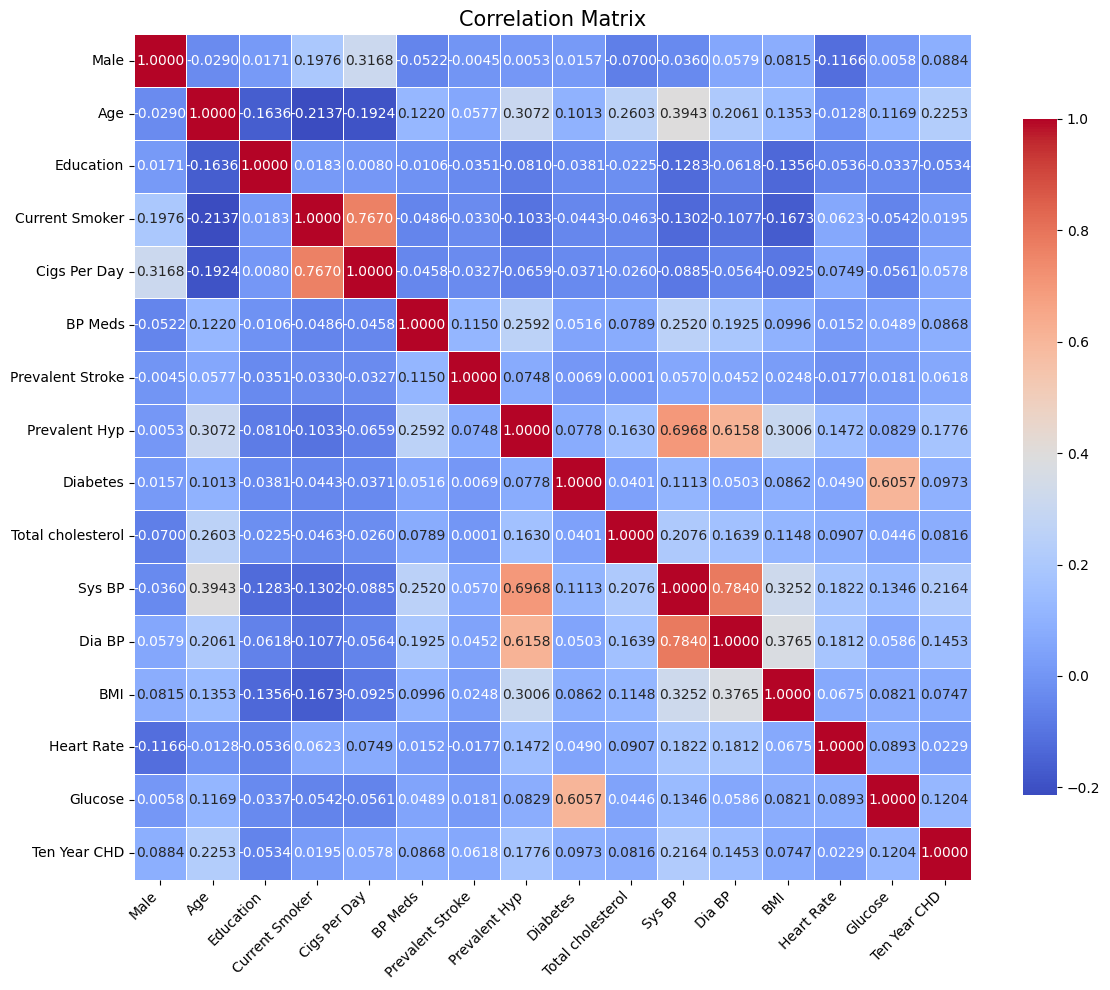

In [115]:
# Visualize the Data

import seaborn as sns
import matplotlib.pyplot as plt

# Increase figure size to reduce overlap
plt.figure(figsize=(12, 10))

# Plot the heatmap with adjusted parameters
sns.heatmap(
    data_scaled.corr(),
    annot=True,
    fmt='.4f',  # Limit decimal places
    annot_kws={"size": 10},  # Adjust font size
    cmap='coolwarm',
    cbar_kws={'shrink': .8},  # Shrink color bar
    linewidths=.5  # Add lines between cells
)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set the title and show the plot
plt.title('Correlation Matrix', size=15)
plt.tight_layout()  # Adjust layout to fit annotations better
plt.show()



# **Key Observations**

**Target Variable ('Ten Year CHD') Correlations**

- Age (0.2253): Age has a moderate positive correlation with the risk of coronary heart disease, indicating that older age is associated with a higher risk.
- Glucose (0.1204): Higher glucose levels show a weak positive correlation with the risk of coronary heart disease.
- Sys BP (0.2164): Systolic blood pressure has a moderate positive correlation with CHD, suggesting higher systolic blood pressure is linked to increased CHD risk.
- Prevalent Hyp (0.1776): A moderate positive correlation with prevalent hypertension indicates that individuals with hypertension are at a higher risk for CHD.
- Total cholesterol (0.0816) and Diabetes (0.0973): These factors show weak positive correlations with CHD.

**High Inter-Feature Correlations**
- 'Cigs Per Day' and 'Current Smoker' (0.7670): These two variables are highly correlated, as expected since current smokers tend to have higher cigarette consumption.
- 'Sys BP' and 'Dia BP' (0.7840): Systolic and diastolic blood pressure are strongly correlated, indicating that as one measure of blood pressure increases, so does the other.
- 'Prevalent Hyp' and 'Sys BP' (0.6968): Hypertension (high blood pressure) correlated with systolic blood pressure, reflecting the clinical relationship between these conditions.
- 'Glucose' and 'Diabetes' (0.6057): There is a strong correlation between glucose levels and diabetes status, consistent with the clinical definition of diabetes.

**Low and Negative Correlations**
- 'Current Smoker' and 'Age' (-0.2137): There is a weak negative correlation between being a current smoker and age, suggesting younger individuals in this dataset are more likely to be current smokers.
- 'Education' has low correlations with other variables: It shows very little correlation with other factors, indicating it might not be a significant predictor for coronary heart disease in this context.

**Feature Independence**
- Many features, such as 'Male', 'Education', 'Heart Rate', and 'BMI', have low correlations with other variables and the target variable, suggesting they are relatively independent of features in linear relationships.


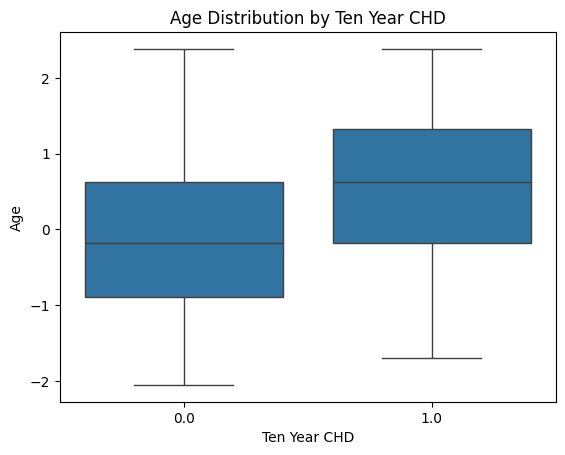

In [116]:
# Plot distribution of 'Ten Year CHD' by key features
sns.boxplot(x='Ten Year CHD', y='Age', data=data_scaled)
plt.title('Age Distribution by Ten Year CHD')
plt.show()

The box plot indicates that age is a significant factor in the development of CHD over ten years. People who have developed CHD over ten years tend to be older compared to those who have not. Both groups show a similar range and spread in age. However, the distribution for individuals with CHD is higher, suggesting older age groups are more prone to CHD.

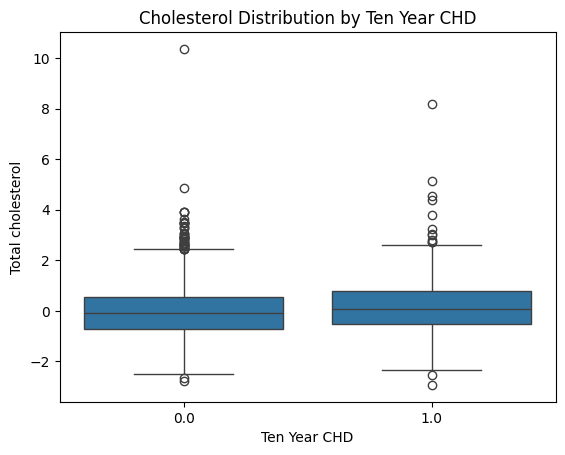

In [117]:
sns.boxplot(x='Ten Year CHD', y='Total cholesterol', data=data_scaled)
plt.title('Cholesterol Distribution by Ten Year CHD')
plt.show()

The box plot suggests that total cholesterol levels are distributed similarly among individuals who developed CHD over ten years and those who did not. The central tendency (median) and variability (IQR) are similar for both groups.

However, both groups have several outliers, indicating that while most individuals have cholesterol levels within a narrow range around the mean, some have very high or low cholesterol levels.

This information indicates that while cholesterol is a risk factor for CHD, its distribution alone does not show a marked difference between individuals with and without CHD in this dataset. Other factors in cholesterol levels might play a significant role in determining CHD risk.

# Model Development

In [118]:
# Step 1: Feature Selection

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('/content/framingham_heart_disease.csv')
data = df
df = pd.DataFrame(data)


# Select features
selected_features = ['Age', 'Sys BP', 'Prevalent Hyp', 'Diabetes', 'Current Smoker', 'Total cholesterol']

# Define X and y
X = df[selected_features]
y = df['Ten Year CHD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
# Step 2: Dimensionality Reduction
# Handle highly correlated features by combining them or selecting one.
# This step reduces redundancy and avoids multicollinearity issues.

# Create a new feature for combined blood pressure
df['BP Index'] = (df['Sys BP'] + df['Dia BP']) / 2

# Update selected features
selected_features = ['Age', 'BP Index', 'Prevalent Hyp', 'Diabetes', 'Current Smoker', 'Total cholesterol']

# Redefine X
X = df[selected_features]

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
# # Step 3: Feature Engineering
# # Create new features or transformations to capture non-linear relationships and interactions between variables.

# # Create interaction features
# df['Age_Cholesterol'] = df['Age'] * df['Total cholesterol']

# # Apply log transformation
# df['Log_Total_Cholesterol'] = df['Total cholesterol'].apply(lambda x: np.log(x + 1))

# # Update selected features
# selected_features = ['Age', 'BP Index', 'Prevalent Hyp', 'Diabetes', 'Current Smoker', 'Age_Cholesterol', 'Log_Total_Cholesterol']

# # Redefine X
# X = df[selected_features]

# # Split data again
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
# Step 3: Feature Engineering
# Create new features or transformations to capture non-linear relationships and interactions between variables.

import warnings
warnings.filterwarnings('ignore')

# Create interaction features
df['Age_Cholesterol'] = df['Age'] * df['Total cholesterol']

# Apply log transformation
df['Log_Total_Cholesterol'] = df['Total cholesterol'].apply(lambda x: np.log(x + 1))

# Update selected features
selected_features = ['Age', 'BP Index', 'Prevalent Hyp', 'Diabetes', 'Current Smoker', 'Age_Cholesterol', 'Log_Total_Cholesterol']

# Redefine X
X = df[selected_features]

# Handle missing values (e.g., impute with mean)
X.fillna(X.mean(), inplace=True) # Fill NaN with the mean of each column

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the Dataset or Adjust Class Weights
# Option A: Using Oversampling

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after resampling:", np.bincount(y_resampled))

Class distribution after resampling: [2870 2870]


In [122]:
# Check for missing values
missing_values = X.isnull().sum()
print(missing_values)


Age                      0
BP Index                 0
Prevalent Hyp            0
Diabetes                 0
Current Smoker           0
Age_Cholesterol          0
Log_Total_Cholesterol    0
dtype: int64


In [123]:
X = X.dropna()  # Drop rows with NaN values

In [124]:
# Step 4: Multicollinearity Check
# Check for multicollinearity among features and take steps to mitigate it
# Calculate VIF (Variance Inflation Factor)
# VIF values greater than 10 indicate high multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Remove features with high VIF
features_to_drop = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
X = X.drop(columns=features_to_drop)

# Update the data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                 feature         VIF
0                    Age   74.245668
1               BP Index   95.037715
2          Prevalent Hyp    2.903211
3               Diabetes    1.042331
4         Current Smoker    2.084168
5        Age_Cholesterol   31.848780
6  Log_Total_Cholesterol  109.252401


In [125]:
# Step 5: Model Testing
# Test complex models like decision trees, random forests, or gradient boosting to handle feature interactions better

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Check if any positive cases are predicted
def check_predictions(y_test, y_pred):
    if np.any(y_pred == 1):
        return True
    return False

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Check if the model predicts any positive cases
    if not check_predictions(y_test, y_pred):
        print("No positive cases predicted.")
        continue

    print("Accuracy:", model.score(X_test, y_test))
    print("Precision:", classification_report(y_test, y_pred, output_dict=True)['1']['precision'])
    print("Recall:", classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
    print("F1 Score:", classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'])
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.6898584905660378
Precision: 0.2397003745318352
Recall: 0.5161290322580645
F1 Score: 0.3273657289002557
ROC AUC Score: 0.6472219746925681
Confusion Matrix:
 [[521 203]
 [ 60  64]]
--- Random Forest ---
Accuracy: 0.6898584905660378
Precision: 0.2397003745318352
Recall: 0.5161290322580645
F1 Score: 0.3273657289002557
ROC AUC Score: 0.6477900552486188
Confusion Matrix:
 [[521 203]
 [ 60  64]]
--- Gradient Boosting ---
No positive cases predicted.


# In Progress ...